# 데이터 탐색

## 데이터의 요약이나 통계 정보를 출력

In [2]:
# 기본 작업
import numpy as np
import pandas as pd
# matplotlib 기반의 그래프를 출력할 때 한글을 사용하기 위한 설정
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

## 탐색적 시각화 이용

### 히스토그램
#### 빈도 분석을 위해서 그리는 차트
#### 변수가 하나인 단변수 데이터의 빈도 수를 표현

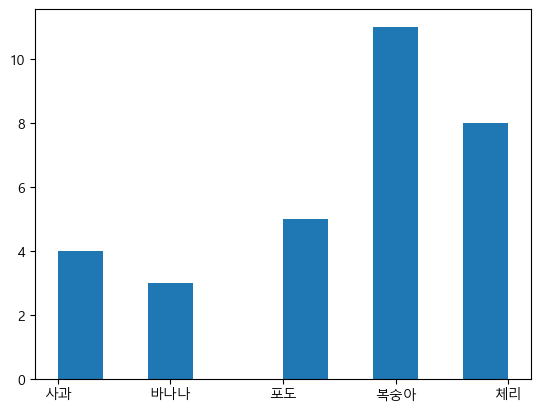

In [11]:
#lovefruits.csv 파일 읽기
#첫행이 컬럼이름
#구분자는 ,
#한글이 있음
df = pd.read_csv('./data/lovefruits.csv', encoding = 'ms949')
#print(df)

#컬럼에 대한 정보
#print(df.info())

#빈도수 확인 - 옵션을 설정하징낳으면 내림차순 정렬을 수행
data = df['선호과일'].value_counts()
#print(data)

plt.hist(df['선호과일'])
plt.show()

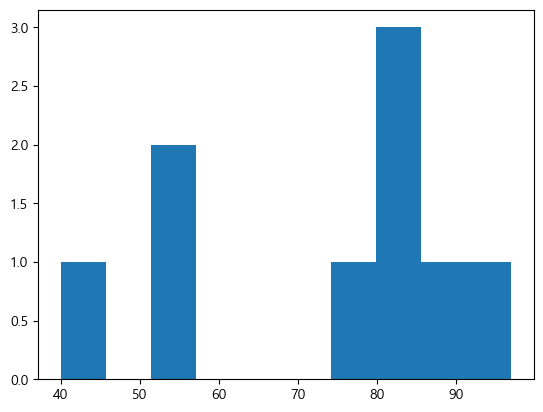

In [14]:
df = pd.read_csv('./data/student.csv', encoding = 'ms949')
#print(df.info())

#점수처럼 여러 값이 존재하는 경우는 되도록이면 
#구간 별로 히스토그램을 그리는 것이 좋음
#bins=3은 세 구간으로 나눈다는 것
plt.hist(df['수학'], bins=3)
plt.show()

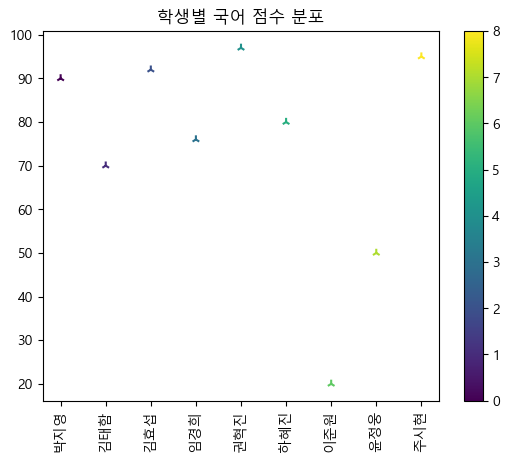

In [19]:
df = pd.read_csv('./data/student.csv', encoding ='ms949')
plt.figure()

#색상설정
colormap = df.index
plt.scatter(x = df.index, y = df['국어'], marker = '2', c=colormap)
plt.xticks(range(0, len(df['국어']), 1), df['이름'], rotation = 'vertical')
plt.colorbar()

#title 달기
plt.title('학생별 국어 점수 분포')

plt.show()

In [44]:
# 여러개의 컬럼을 이용한 산포도
df = pd.read_csv('./data/noheader_auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
print(df.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [45]:
df['cylinders_size'] = df['cylinders']/df.cylinders.max() * 300
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  cylinders_size  
0       1  chevrolet chevelle malibu           300.0  
1       1          buick skylark 320           300.0  
2       1         plymouth satellite           300.0  
3       1              amc rebel sst           300.0  
4       1                ford torino           300.0  


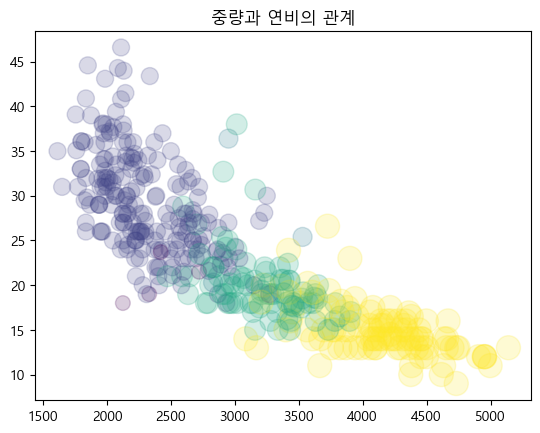

In [46]:
colormap = df['cylinders']
plt.scatter(x=df['weight'], y=df['mpg'], s = df['cylinders_size'],
           c=colormap, alpha=0.2)
plt.title("중량과 연비의 관계")
plt.show()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


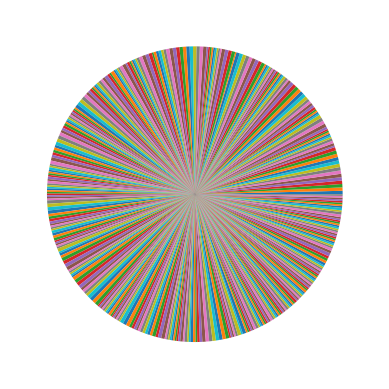

In [48]:
print(df['cylinders'].value_counts())
plt.pie(df['cylinders'])
plt.show()

<class 'pandas.core.series.Series'>


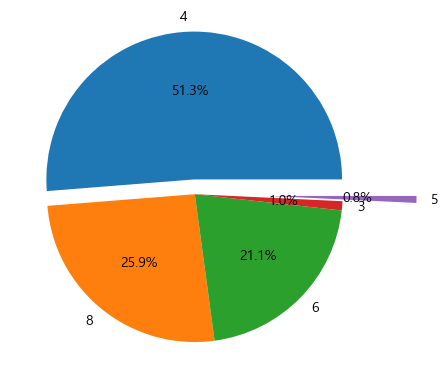

In [55]:
x = df['cylinders'].value_counts()
print(type(x))
explode=(0.1,0,0,0,0.5)
plt.pie(x, labels=x.index, autopct='%1.1f%%', explode=explode)
plt.show()

In [56]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, capwidths=None, *, data=None)
    Draw a box and whisker plot.
    
    The box extends from the first quartile (Q1) to the third
    quartile (Q3) of the data, with a line at the median.  The
    whiskers extend from the box by 1.5x the inter-quartile range
    (IQR).  Flier points are those past the end of the whiskers.
    See https://en.wikipedia.org/wiki/Box_plot for reference.
    
    .. code-block:: none
    
              Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                           |-----:-----|
           o      |--------|    

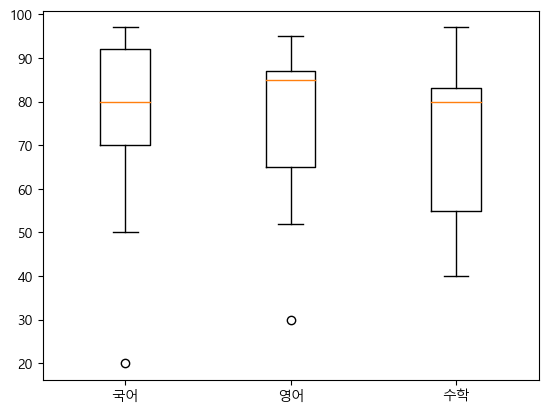

In [57]:
df = pd.read_csv('./data/student.csv', encoding='ms949')
plt.boxplot([df['국어'], df['영어'], df['수학']], labels=('국어', '영어', '수학'))
plt.show()

### Seaborn

In [58]:
import seaborn as sns
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


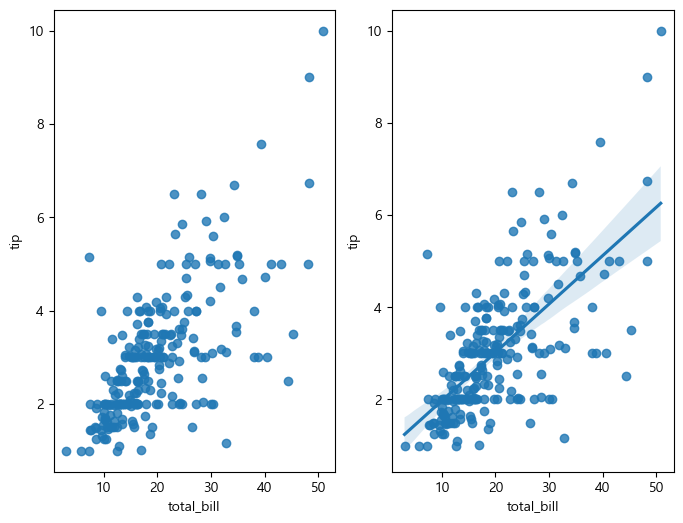

In [59]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False, ax=ax1)
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=True, ax=ax2)
plt.show()

In [60]:
!pip install folium

In [67]:
import folium

#지도를 생성 - location은 중앙점의 위치고 zoom_start는 확대 축소 배율
m = folium.Map(location = [37.572656, 126.973304], zoom_start = 15)
#마커 출력
folium.Marker(location=[37.572656, 126.973304], popup="KB 카드",
             icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker(location=[37.579027, 126.987279], popup="Mega IT",
             icon=folium.Icon(icon='cloud')).add_to(m)
folium.RegularPolygonMarker([37.579027, 126.987279], popup="가나다라마바사",
             number_of_sides=6, radius=30, fill_color='#999999').add_to(m)


#html 파일로 저장
m.save("map.html")

m

In [76]:
df = pd.read_excel('./data/서울지역_대학교_위치.xlsx')
#print(df.head())
#print(df.info())

m = folium.Map(location=[37.55, 126.98], zoom_start=12)

#DataFrame의 데이터 순회
for name, lat, Ing in zip(df['Unnamed: 0'], df['위도'], df['경도']):
    
    folium.CircleMarker([lat, Ing], radius=10, color='blue', fill=True,
                       fill_color='coral', fill_opacity=0.7, popup=name).add_to(m)
    print(name, lat, Ing)
m

KAIST 서울캠퍼스  37.592573 127.046737
KC대학교 37.5483449 126.8547974
가톨릭대학교(성신교정) 37.5859218 127.0043275
가톨릭대학교(성의교정) 37.4996227 127.0060653
감리교신학대학교 37.5676455 126.96161
건국대학교 37.5407625 127.0793428
경기대학교 서울캠퍼스  37.30048499999999 127.035833
경희대학교 서울캠퍼스  37.5961951 127.052544
고려대학교 33.8477818 -117.9777482
광운대학교 37.6194965 127.0596958
국민대학교 37.6096409 126.997697
덕성여자대학교 37.6511988 127.0161604
동국대학교 37.5574771 127.0020518
동덕여자대학교 37.6063202 127.041808
명지대학교 서울캠퍼스  37.5802046 126.9234451
삼육대학교 37.6429515 127.1054757
상명대학교 서울캠퍼스  37.602638 126.955252
서강대학교 37.5509442 126.9410023
서경대학교 37.615095 127.0131113
서울과학기술대학교 37.6316684 127.0774813
서울교육대학교 37.4899615 127.0164124
서울기독대학교 37.6009228 126.9123818
서울대학교 37.459882 126.9519053
서울시립대학교 37.5838657 127.0587771
서울여자대학교 37.6281126 127.0904568
서울한영대학교 37.4965411 126.8512616
성공회대학교 37.4872325 126.8253202
성균관대학교 서울캠퍼스   37.588227 126.993606
성신여자대학교 37.5913103 127.0221312
세종대학교 37.5502596 127.073139
숙명여자대학교 37.5463644 126.9648311
숭실대학교 37.4963111 126.957

In [84]:
# 경기도 인구 단계 구분도
#json 파싱을 위한 패키지
import json

# 경기도 인구 데이터 가져오기
df = pd.read_excel("./data/경기도인구데이터.xlsx")
#print(df.head())

#컬럼의 이름이 숫자 형태라서 사용하기가 번거로울 수 있으므로 문자열로 변환
df.columns = df.columns.map(str)

#행정 구역 경계와 관련된 json 파일을 열어서 파싱
#utf-8-sig는 파일 형식에 상관없이 인코딩해서 디코딩을 편히ㅏ게 해주는 인코딩 방식
try:
    geo_data = json.load(open('./data/경기도행정구역경계.json', encoding = 'utf-8'))
except:
    geo_data = json.load(open('./data/경기도행정구역경계.json', encoding = 'utf-8-sig'))
#print(geo_data)    

#지도 생성
g_map = folium.Map(location=[37.5502, 126.982], zoom_start=9, tiles="Stamen Terrain")
df.index = df['구분']
#단계 구분도 만들기
folium.Choropleth(geo_data = geo_data, 
                  data=df['2015'],
                 columns=[df.index, df['2015']],
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 400000, 700000],
                 key_on='feature.properties.name').add_to(g_map)

g_map

<Axes: >

C:\Users\user\AppData\Local\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


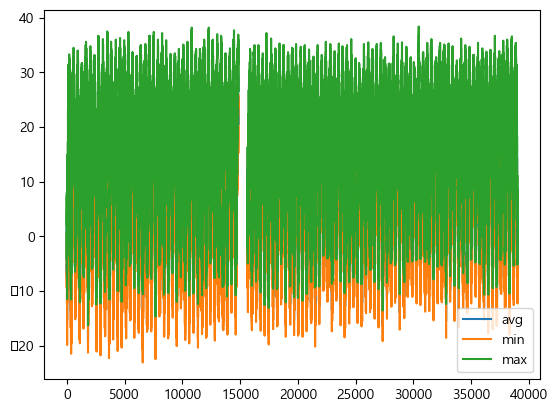

In [87]:
df = pd.read_csv('./data/seoul.csv', encoding='ms949')
df.plot()

<Axes: xlabel='date'>

C:\Users\user\AppData\Local\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


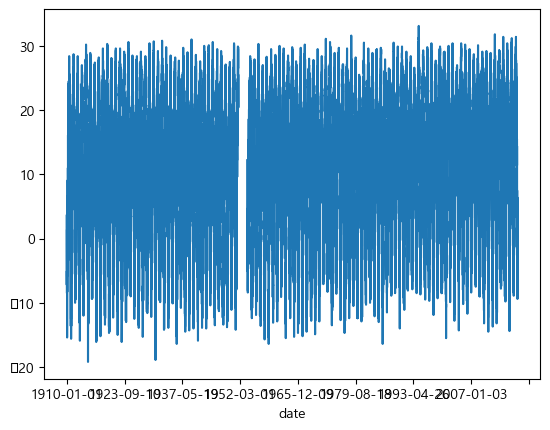

In [91]:
df.index = df['date']
df['avg'].plot()

<Axes: >

C:\Users\user\AppData\Local\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


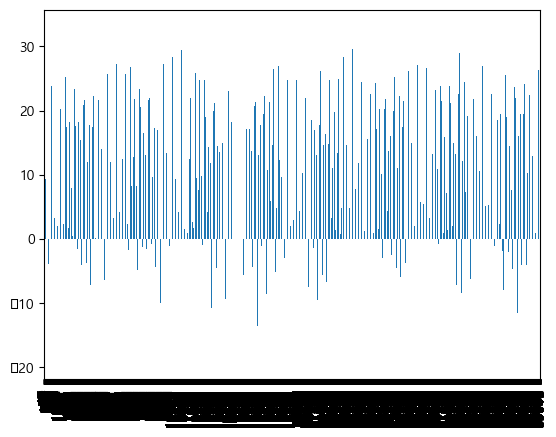

In [89]:
df['avg'].plot(kind='bar')

In [98]:
df = pd.DataFrame([['안녕하세요', '니하오', '헬로우', '키아 오라', '안녕하세요'], 
                ['한국', '중국', ' 미국', '뉴질랜드', '한국']])
# 열과 행 전치
df = df.T
#print(df)

#중복 확인
#print(df.duplicated())

df.drop_duplicates(inplace=True)
#중복 확인
print(df.duplicated())

0    False
1    False
2    False
3    False
dtype: bool


In [100]:
def f(data):
    return data + '...'

#Series에 함수 적용
#Series는 셀 단위 적용
print(df[0].apply(f))

#DataFrame은 행이나 열 단위 적용인데 기본은 열 단위 적용
print(df.apply(f))

#applymap은 셀 단위 적용
print(df.applymap(f))

#lambda매개변수이름 나열: 리턴할 식
print(df[0].apply(lambda data : data + '...'))

0    안녕하세요...
1      니하오...
2      헬로우...
3    키아 오라...
Name: 0, dtype: object
          0        1
0  안녕하세요...    한국...
1    니하오...    중국...
2    헬로우...    미국...
3  키아 오라...  뉴질랜드...


In [103]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
#print(titanic.head())

df = titanic[['age', 'fare']]
#print(df.head())

def min_max(data):
    return data.max() - data.min()
#열 단위로 함수 적용
result = df.apply(min_max, axis=0)
print(result)

age      79.5800
fare    512.3292
dtype: float64


In [110]:
#print(titanic.head())

df = titanic[['age', 'fare']]
#print(type(df))

#하나의 데이터를 가지고 null 여부를 판단해주는 함수를 대입
# 셀단위로 적용해서 DataFrame을 리턴트
#print(df.pipe(lambda x: x.isnull()))

def missing_value(x):
    return x.isnull()
#집계를 하는 함수를 대입하면 열 단위로 대입해서 집계를 수행한 후 Series를 리턴
print(df.pipe(lambda x : missing_value(x).sum()))

def missing_count(x):
    return missing_value(x).sum()

#Series를 리턴하는 함수를 대입하면 하나의 값을 리턴
print(df.pipe(lambda x : missing_count(x).sum()))

age     177
fare      0
dtype: int64
177


In [118]:
df = pd.read_excel('./data (3)/주가데이터.xlsx')
#print(df.info())

#자료형이 datatime64 라서 split을 사용할 수 없음
#dates = df['연월일'].str.split('-')

#데이터 타입 변경
#astype을 호출해서 변경
#map 함수에 형을 변경할 수 있는 함수를 대입
df['연월일']=df['연월일'].astype('str')
dates = df['연월일'].str.split('-')
#print(dates.head())

df['연'] = dates.str.get(0)
df['월'] = dates.str.get(1)
df['일'] = dates.str.get(2)
print(df.head())



          연월일   당일종가  전일종가     시가     고가     저가     거래량     연   월   일
0  2018-07-02  10100   600  10850  10900  10000  137977  2018  07  02
1  2018-06-29  10700   300  10550  10900   9990  170253  2018  06  29
2  2018-06-28  10400   500  10900  10950  10150  155769  2018  06  28
3  2018-06-27  10900   100  10800  11050  10500  133548  2018  06  27
4  2018-06-26  10800   350  10900  11000  10700   63039  2018  06  26


In [123]:
df1 = pd.DataFrame({
    'a':['a1', 'a2', 'a3', 'a4'],
    'b':['b1', 'b2', 'b3', 'b4'],
    'c':['c1', 'c2', 'c3', 'c4'],
}, index = [1, 2, 3, 4])

df2 = pd.DataFrame({
    'a':['a2', 'a3', 'a4', 'a5'],
    'b':['b2', 'b3', 'b4', 'b5'],
    'c':['c2', 'c3', 'c4', 'c5'],
}, index = [2, 3, 4, 5])


#print(df1)
#print(df2)

#기본적으로 행 방향으로 결합
#동일한 컬럼은 값이 있지만 한쪽에만 존재하는 컬럼은 반대쪽에는 NaN이 됨
#print(pd.concat([df1+df2]))
#한쪽에만 존재하는 데이터도 결합 - Outer Join
#동일한 인덱스끼리 옆으로 결합
#print(pd.concat([df1,df2], axis=1))

#동일한 인덱스끼리 옆으로 결합
#양쪽 모두에 존재하는 데이터만 결합 - inner join
print(pd.concat([df1,df2], axis=1, join='inner'))


     a    b    c    a    b    c
1   a1   b1   c1  NaN  NaN  NaN
2   a2   b2   c2   a2   b2   c2
3   a3   b3   c3   a3   b3   c3
4   a4   b4   c4   a4   b4   c4
5  NaN  NaN  NaN   a5   b5   c5


In [124]:
print(df1.append(df2))

    a   b   c
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3
4  a4  b4  c4
2  a2  b2  c2
3  a3  b3  c3
4  a4  b4  c4
5  a5  b5  c5


C:\Users\user\AppData\Local\Temp\ipykernel_14268\1388991793.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df1.append(df2))


In [129]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan])
b = pd.Series(np.arange(len(a), dtype=np.float64))
#print(a)
#print(b)

#a의 값이 NaN인 경우 b의 값으로 채우기
#조건이 True인 경우는 데이터1, False인 경우는 데이터2
#r = np.where(조건, 데이터1, 데이터2)
r = np.where(pd.isnull(a), b, a)
#numpy의 1차원 배열은 출력할 때 행 방향으로 출력함
print(r)

#아래 두개는 출력하는 방법만 다르고 같은 것을 출력함
print(pd.Series(r))
print(a.combine_first(b))

[0.  2.5 2.  3.5 4.5 5. ]
0    0.0
1    2.5
2    2.0
3    3.5
4    4.5
5    5.0
dtype: float64
0    0.0
1    2.5
2    2.0
3    3.5
4    4.5
5    5.0
dtype: float64


In [135]:
price = pd.read_excel('./data (3)/data/stock price.xlsx')
valuation = pd.read_excel('./data (3)/data/stock valuation.xlsx')

#print(price)
#print(valuation)

inner_join = pd.merge(price, valuation)
print(inner_join)



#join = df[[id, stock_name, value, price, eps, bps, \]]

       id stock_name          value   price    name           eps     bps  \
0  130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
1  139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
2  145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
3  185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
4  204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

         per       pbr  
0  15.695091  1.829178  
1  13.931338  0.860437  
2  14.283226  0.758627  
3  25.185866  2.470259  
4  40.802348  0.651359  


In [136]:
outer_join = pd.merge(price, valuation, how='outer')
print(outer_join)

        id stock_name          value     price       name           eps  \
0   128940       한미약품   59385.666667  421000.0        NaN           NaN   
1   130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   
2   138250      엔에스쇼핑   14558.666667   13200.0        NaN           NaN   
3   139480        이마트  239230.833333  254500.0        이마트  18268.166667   
4   142280     녹십자엠에스     468.833333   10200.0        NaN           NaN   
5   145990        삼양사   82750.000000   82000.0        삼양사   5741.000000   
6   185750        종근당   40293.666667  100500.0        종근당   3990.333333   
7   192400      쿠쿠홀딩스  179204.666667  177500.0        NaN           NaN   
8   199800         툴젠   -2514.333333  115400.0        NaN           NaN   
9   204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667   
10  136480        NaN            NaN       NaN         하림    274.166667   
11  138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   
12  161390        NaN    

In [138]:
price = pd.read_excel('./data (3)/data/stock price.xlsx', index_col = 'id')
valuation = pd.read_excel('./data (3)/data/stock valuation.xlsx', index_col = 'id')

#인스턴스로 부를 수 있는 것은 클래스로 부를 수 있는 것임
#인스턴스로 메서드 호출 - 바운드 호출
#print(price.join(valuation))
#클래스로 인스턴스 메서드 호출 - 언바운드 호출
print(pd.DataFrame.join(price, valuation))

       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN